# Instacart Order Prediction

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read all the files
df_orders=pd.read_csv('data/orders.csv')
df_order_products_prior=pd.read_csv('data/order_products__prior.csv')
df_order_products_train=pd.read_csv('data/order_products__train.csv')
df_aisle=pd.read_csv('data/aisles.csv')
df_departments=pd.read_csv('data/departments.csv')
df_products=pd.read_csv('data/products.csv')

In [19]:
#sample 10% sample in prior for faster processing MZ only
df_order_products_prior=df_order_products_prior.sample(frac=0.1, replace=True, random_state=1)

In [27]:
df_order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.621724e+06,1.621724e+06,1.621724e+06,1.621724e+06
mean,1.711915e+06,2.556246e+04,8.341720e+00,5.897341e-01
std,9.872421e+05,1.410048e+04,7.114546e+00,4.918820e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.574622e+05,1.351100e+04,3.000000e+00,0.000000e+00
50%,1.713508e+06,2.521100e+04,6.000000e+00,1.000000e+00
75%,2.565526e+06,3.792300e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.440000e+02,1.000000e+00


## Examine all the files and run descriptives

### Orders File

In [3]:
df_orders.head(30)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
df_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


### Prior Orders

In [6]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
df_order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [8]:
df_order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


### Training file 

In [9]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
df_order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [11]:
df_order_products_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


### Department 

In [13]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [15]:
df_departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


### Aisle 

In [16]:
df_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
df_aisle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [18]:
df_aisle.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


## Modeling - KMeans

In [150]:
user_total_orders = df_orders['order_id']
user_avg_lag = df_orders.groupby(['user_id'])['days_since_prior_order'].mean()

(2,)

In [152]:
user_total_orders.head()

0    2539329
1    2398795
2     473747
3    2254736
4     431534
Name: order_id, dtype: int64

In [151]:
user_avg_lag.head()

user_id
1    19.000000
2    16.285714
3    12.000000
4    17.000000
5    11.500000
Name: days_since_prior_order, dtype: float64

In [154]:
data = np.array([user_total_orders, user_avg_lag])
#data = data.transpose()
#data.shape

In [155]:
data

array([0          2539329
1          2398795
2           473747
3          2254736
4           431534
5          3367565
6           550135
7          3108588
8          2295261
9          2550362
10         1187899
11         2168274
12         1501582
13         1901567
14          738281
15         1673511
16         1199898
17         3194192
18          788338
19         1718559
20         1447487
21         1402090
22         3186735
23         3268552
24          839880
25         1492625
26         1374495
27          444309
28         3002854
29         2037211
            ...   
3421053    2789700
3421054     844592
3421055    1541132
3421056    2808240
3421057    3027766
3421058    3356245
3421059     442304
3421060    2675140
3421061     167903
3421062    2393201
3421063    3292671
3421064    3059777
3421065    2239861
3421066    1285346
3421067    1882108
3421068     803273
3421069    3154581
3421070    1889163
3421071    1542354
3421072     688306
3421073    2307371
34210

ValueError: x and y must be the same size

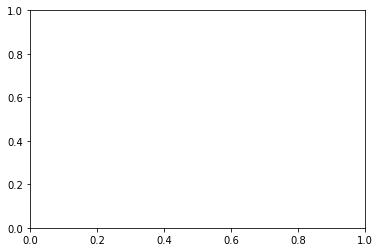

In [22]:
plt.scatter(user_total_orders, user_avg_lag)

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
type(data)

numpy.ndarray

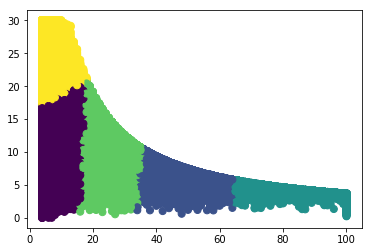

In [71]:
predicted_clusters = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')

# User segmentation - Aisle

We hope to understand how to segment users into different groups through their behavior of ordering from different aisle. We picked aisle specifically because it's a measurement between departments and products that give us good representation of the data, unlike products which is too granular or departments which is too general. 

As there are 134 aisles, we hope to use PCA to decrease the number of dimensions we are working with first, then we will use k-means to cluster users into different groups. 

## Data Wrangling for PCA - Aisle Clustering

In [3]:
#Merge training file with aisle and products
aisle_df = df_orders.merge(df_order_products_train, on='order_id')
aisle_df = aisle_df.merge(df_products, on='product_id')
aisle_df = aisle_df.merge(df_aisle, on='aisle_id')

In [68]:
aisle_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,soft drinks
5,692135,865,train,4,5,11,30.0,196,1,0,Soda,77,7,soft drinks
6,3289231,992,train,22,5,14,30.0,196,6,1,Soda,77,7,soft drinks
7,1269882,1306,train,7,5,10,6.0,196,9,1,Soda,77,7,soft drinks
8,1558696,1512,train,4,1,10,27.0,196,1,0,Soda,77,7,soft drinks
9,2005577,1550,train,14,1,14,30.0,196,6,1,Soda,77,7,soft drinks


In [4]:
#grab columns of user ID and aisle only
aisle_df = aisle_df[['user_id', 'aisle']]

In [70]:
aisle_df.tail(10)

,user_id,aisle
1384607,153227,eye ear care
1384608,177135,eye ear care
1384609,203063,eye ear care
1384610,153606,eye ear care
1384611,189049,eye ear care
1384612,163244,eye ear care
1384613,175548,eye ear care
1384614,185097,eye ear care
1384615,203231,eye ear care
1384616,204661,eye ear care


In [5]:
#create dummy variables to recode aisle column into individual columns
aisle_dummy_df = pd.get_dummies(aisle_df.aisle)
aisle_dummy_df = pd.concat([aisle_df, aisle_dummy_df], axis=1)
aisle_dummy_df = aisle_dummy_df.drop(['aisle'], axis=1)
aisle_dummy_df.head()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,676,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,760,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,804,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
aisle_dummy_df.describe()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,...,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.031128e+05,7.706102e-04,5.060605e-03,2.209997e-04,2.368886e-04,9.531878e-03,1.084054e-03,9.452433e-03,7.901102e-04,2.072775e-04,...,8.740323e-03,6.771548e-03,3.699940e-03,6.032715e-03,1.056610e-03,1.170721e-03,1.422054e-03,2.644558e-02,7.857769e-04,3.989551e-02
std,5.948715e+04,2.774918e-02,7.095773e-02,1.486442e-02,1.538937e-02,9.716495e-02,3.290714e-02,9.676307e-02,2.809780e-02,1.439565e-02,...,9.308027e-02,8.201036e-02,6.071452e-02,7.743595e-02,3.248837e-02,3.419578e-02,3.768332e-02,1.604563e-01,2.802071e-02,1.957138e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.173200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.029330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.549590e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.062090e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#group rows by user_id so that we know what users have ordered in the history
aisle_group = aisle_dummy_df.groupby('user_id')
user_aisle_df = aisle_group.sum()
user_aisle_df.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [144]:
user_aisle_df.describe()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,...,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000,131209.000000
mean,0.008132,0.053403,0.002332,0.002500,0.100588,0.011440,0.099749,0.008338,0.002187,0.014016,...,0.092235,0.071459,0.039045,0.063662,0.011150,0.012354,0.015007,0.279074,0.008292,0.421008
std,0.109886,0.273864,0.048864,0.054602,0.702535,0.114155,0.402803,0.105229,0.048949,0.193116,...,0.335397,0.360375,0.239545,0.260521,0.109621,0.115455,0.137965,0.666126,0.108793,0.950146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,7.000000,2.000000,3.000000,28.000000,3.000000,11.000000,5.000000,3.000000,10.000000,...,7.000000,27.000000,7.000000,4.000000,4.000000,3.000000,8.000000,16.000000,5.000000,26.000000


After data is processed, we now proceed with PCA. 

## Principle Component Analysis (PCA)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

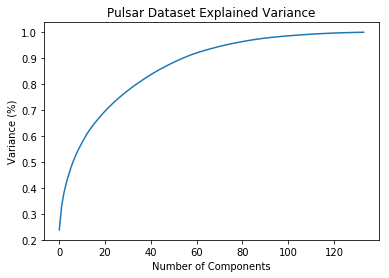

In [74]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(user_aisle_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

Using the elbow method to determine how many components (aisle) we would like to reduce to, 60 seems to be where the elbow turns that 60 components can already explain 90% variance of the data. The number of aisle to be analyzed reduce from 134 down to 60. 

In [134]:
pca = PCA(n_components=60)
pca_samples = pca.fit_transform(user_aisle_df)

ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.585968,-0.068665,1.013516,-0.235314,0.354537,-0.094326,-0.404249,-0.589435,-0.032123,0.012663,...,-0.226562,0.053254,-0.020733,0.085708,0.342045,0.031322,0.325551,0.208656,0.707620,-0.071227
1,1.941122,5.166711,-1.604430,-0.862847,2.860315,-0.725146,-1.601652,5.280212,-4.043001,-0.083405,...,-0.014956,-0.127270,-0.325204,0.114603,0.316822,-0.092491,0.217758,0.291952,0.674406,-0.155566
2,0.074848,-0.008703,-0.265352,1.375279,-0.590969,0.088451,-0.282896,-0.527463,-0.155426,0.210282,...,-0.295926,1.671333,0.060452,0.043345,0.168187,-0.530026,-0.711269,-0.150435,0.114103,-0.016100
3,-1.172812,0.391134,-0.402283,-0.261557,0.207822,-0.194117,0.064343,0.543089,0.431214,-0.321171,...,0.019387,-0.083156,-0.097671,-0.061373,0.028515,-0.017749,-0.072101,-0.113762,0.023461,-0.082867
4,6.420225,-4.774948,-0.290909,-0.606733,-0.417035,-0.000676,0.217818,0.314555,0.144593,0.062811,...,-0.071772,0.074297,0.048704,0.015715,-0.582838,-0.262795,0.808971,0.117775,-0.059591,-0.075115


In [32]:
'Exfplained variation per principal component: {}'.format(pca.explained_variance_ratio_)

'Explained variation per principal component: [0.23985437 0.09027253 0.05060737 0.03806379 0.03022255 0.02771549\n 0.02515956 0.02106471 0.01992791 0.0172376  0.01670648 0.0157287\n 0.01512549 0.01371713 0.01233348 0.01172204 0.01102319 0.01040466\n 0.01028568 0.00998046 0.00966943 0.00930734 0.00866753 0.00849311\n 0.00818262 0.0080571  0.00789519 0.00741848 0.00728849 0.00719306\n 0.00698599 0.00673405 0.00667759 0.00631248 0.00614024 0.00610227\n 0.0060075  0.00587862 0.00577988 0.00565252 0.00552259 0.00523497\n 0.00518447 0.005056   0.00486339 0.00471192 0.00460908 0.00454714\n 0.00444337 0.00439768 0.00435856 0.00418208 0.00403837 0.0039351\n 0.00370599 0.00362732 0.00359973 0.00349189 0.0033455  0.0030889 ]'

The first two components in PCA can expalin about 32% variance in the entire dataset. Therefore, we decided to visualize K-Means using the first pair of compenents.

(131209, 2)
          0         1
0 -1.585968 -0.068665
1  1.941122  5.166711
2  0.074848 -0.008703
3 -1.172812  0.391134
4  6.420225 -4.774948


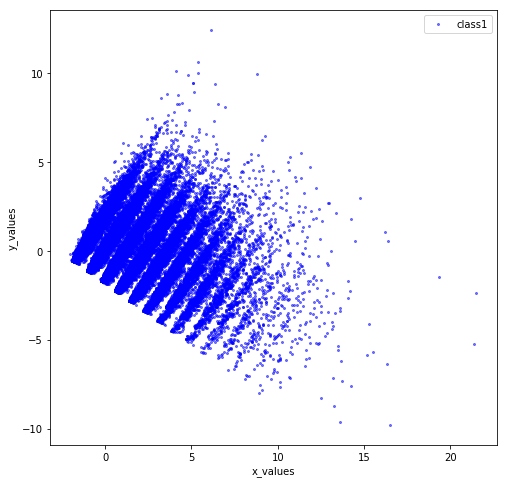

In [121]:
#Scatter plot visualize the data
tocluster = pd.DataFrame(ps[[0,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

## K-Means 

Now we will use K-Means clustering to understand how users can be clustered into different segmentations from how they order from different aisles

In [128]:
pca_samples

array([[-1.58596796e+00, -6.86649487e-02,  1.01351525e+00, ...,
         2.30895818e-02,  7.17678962e-01, -1.44338798e-01],
       [ 1.94112178e+00,  5.16671098e+00, -1.60442977e+00, ...,
         8.46560191e-02,  7.11400495e-01, -2.05566451e-01],
       [ 7.48480236e-02, -8.70251729e-03, -2.65351706e-01, ...,
        -9.81583983e-02,  2.02548758e-02,  1.32668039e-02],
       ...,
       [-6.45690962e-01,  1.27970520e+00, -5.41743406e-01, ...,
        -1.20576493e-01,  3.82392197e-03, -1.07062103e-01],
       [ 1.81411611e+00,  4.71054838e+00,  1.80496650e+00, ...,
         6.56647173e-03,  7.26823812e-03, -4.89175612e-02],
       [-1.24372548e+00,  3.40293419e-01, -4.10912021e-01, ...,
        -9.19524936e-02, -6.78368459e-02, -2.85729386e-03]])

In [119]:
#Select the number of clusters using elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_samples)
    Sum_of_squared_distances.append(km.inertia_)

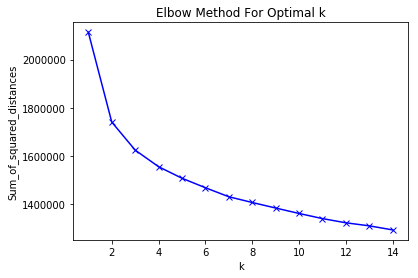

In [120]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see from the elbow graph,5 is the optimal number where we see decreased return by adding more clusters

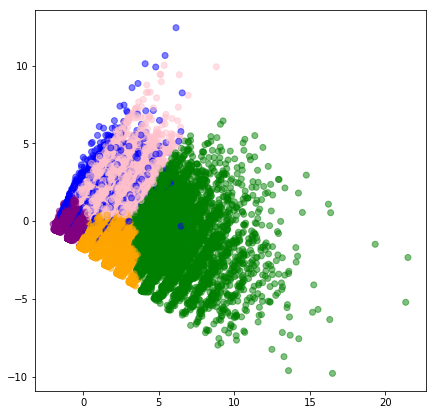

In [130]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
X_clustered = kmeans.fit_predict(pca_samples)

#Define our own color map
LABEL_COLOR_MAP = {0:'orange', 1: 'blue', 2: 'purple', 3: 'green', 4: 'pink'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_samples[:,0],pca_samples[:,1], c= label_color, alpha=0.5) 
plt.show()

Now we will understand how the clusters differ from each other by aisle

In [133]:
#append cluster number to the original data of aisle grouped by user
user_aisle_df_cluster = user_aisle_df.copy()
user_aisle_df_cluster['cluster'] = X_clustered

user_aisle_df_cluster.head(10)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [135]:
user_aisle_df_cluster.groupby(['cluster']).count()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,20631,20631,20631,20631,20631,20631,20631,20631,20631,20631,...,20631,20631,20631,20631,20631,20631,20631,20631,20631,20631
1,6817,6817,6817,6817,6817,6817,6817,6817,6817,6817,...,6817,6817,6817,6817,6817,6817,6817,6817,6817,6817
2,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926,...,75926,75926,75926,75926,75926,75926,75926,75926,75926,75926
3,8356,8356,8356,8356,8356,8356,8356,8356,8356,8356,...,8356,8356,8356,8356,8356,8356,8356,8356,8356,8356
4,19479,19479,19479,19479,19479,19479,19479,19479,19479,19479,...,19479,19479,19479,19479,19479,19479,19479,19479,19479,19479


In [136]:
c=user_aisle_df_cluster.groupby(['cluster']).mean()

In [137]:
c.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.007416,0.086860,0.002569,0.002424,0.075324,0.009306,0.127381,0.008870,0.001987,0.005380,...,0.092482,0.056468,0.063303,0.087344,0.005041,0.008773,0.013184,0.226601,0.005623,0.288934
1,0.006601,0.061464,0.003081,0.004547,0.326830,0.013642,0.107379,0.008948,0.002347,0.009828,...,0.152853,0.112953,0.044154,0.088015,0.016870,0.013936,0.019363,0.388001,0.004841,3.250403
2,0.009285,0.033862,0.001778,0.001989,0.053460,0.011933,0.081263,0.008548,0.002410,0.020599,...,0.069739,0.065998,0.021547,0.039591,0.012236,0.014079,0.013158,0.270000,0.010905,0.149066
3,0.004667,0.133437,0.003351,0.003949,0.189564,0.009574,0.175802,0.009215,0.001915,0.002513,...,0.134753,0.097176,0.110340,0.143011,0.008258,0.009215,0.021182,0.302298,0.002034,0.737793
4,0.006417,0.056984,0.003542,0.003234,0.193696,0.011808,0.107244,0.006366,0.001591,0.003902,...,0.140202,0.083064,0.049181,0.089840,0.012629,0.010216,0.019970,0.321936,0.004826,0.494789


In [138]:
c0=c.iloc[0]
c1=c.iloc[1]
c2=c.iloc[2]
c3=c.iloc[3]
c4=c.iloc[4]

In [139]:
c0=c0.sort_values(ascending=False)
cluster0=pd.DataFrame({'product':c0.index,'mean':c0.values})

c1=c1.sort_values(ascending=False)
cluster1=pd.DataFrame({'product':c1.index,'mean':c1.values})

c2=c2.sort_values(ascending=False)
cluster2=pd.DataFrame({'product':c2.index,'mean':c2.values})

c3=c3.sort_values(ascending=False)
cluster3=pd.DataFrame({'product':c3.index,'mean':c3.values})

c4=c4.sort_values(ascending=False)
cluster4=pd.DataFrame({'product':c4.index,'mean':c4.values})

In [140]:
result = pd.concat([cluster0, cluster1, cluster2, cluster3, cluster4], axis=1, sort=True)

In [141]:
result.head(10)

,product,mean,product,mean,product,mean,product,mean,product,mean
0,fresh vegetables,2.877514,yogurt,3.250403,fresh fruits,0.417551,fresh vegetables,6.112853,fresh fruits,3.202526
1,fresh fruits,0.953953,fresh fruits,1.396215,water seltzer sparkling water,0.270000,fresh fruits,3.253830,packaged vegetables fruits,1.247497
2,packaged vegetables fruits,0.735447,fresh vegetables,0.761039,packaged vegetables fruits,0.267392,packaged vegetables fruits,1.639301,fresh vegetables,1.045690
3,packaged cheese,0.389075,packaged vegetables fruits,0.736394,packaged cheese,0.198825,yogurt,0.737793,yogurt,0.494789
4,yogurt,0.288934,packaged cheese,0.567698,chips pretzels,0.194387,packaged cheese,0.611297,packaged cheese,0.492736
5,fresh herbs,0.255732,chips pretzels,0.459293,fresh vegetables,0.192385,fresh herbs,0.558640,milk,0.392217
6,milk,0.237264,milk,0.458413,milk,0.183363,frozen produce,0.394806,chips pretzels,0.337851
7,soy lactosefree,0.231690,water seltzer sparkling water,0.388001,ice cream ice,0.153834,soy lactosefree,0.388822,water seltzer sparkling water,0.321936
8,water seltzer sparkling water,0.226601,baby food formula,0.326830,yogurt,0.149066,milk,0.366443,soy lactosefree,0.304533
9,frozen produce,0.216567,energy granola bars,0.325070,soft drinks,0.143021,chips pretzels,0.311872,frozen produce,0.283177


In [142]:
result.describe()

,mean,mean,mean,mean,mean
count,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.094601,0.132274,0.049308,0.175575,0.116469
std,0.269875,0.322613,0.061622,0.611496,0.313608
min,0.001503,0.001614,0.001778,0.000838,0.000975
25%,0.008797,0.013716,0.010909,0.009604,0.010486
50%,0.037904,0.051122,0.025215,0.054931,0.044278
75%,0.098032,0.138477,0.064830,0.144537,0.108784
max,2.877514,3.250403,0.417551,6.112853,3.202526


The above information confirmed our hypothesis in descriptive analysis that most popular aisle to order across all clusters is fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt, packaged cheese, milk. 

Detailed segmentation and persona analysis see slides

Persoan analysis result:

cluster 3: infrequent shopper

cluster 4: instacart early adopter

cluster 1: regular grocery shopper

cluster 2: yogurt fanatics

cluster 5: fruits lover